<a href="https://colab.research.google.com/github/marcoscleytton/Matplotlib-Aprendizado/blob/main/taxas_de_convers%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt

In [2]:
taxa_a = 120/1000 # 12%
taxa_b = 160/1000 # 16%

In [3]:
grupos = ['Botão azul (A)', 'Botão verde(B)']
taxas = [taxa_a, taxa_b]

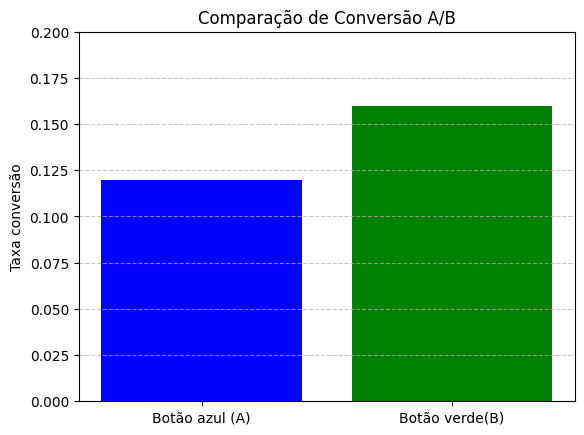

In [6]:
plt.bar(grupos, taxas, color=['blue', 'green'])
plt.ylabel('Taxa conversão')
plt.title('Comparação de Conversão A/B')
plt.ylim(0, 0.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Gráfico de dispersão com Seaborn

Esses gráficos ajudam a visualizar a diferença entre os grupos e reforçam a análise estatística.


In [73]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem, t


In [79]:
import pandas as pd
df = pd.DataFrame({
    'Grupo': ['A'] * 1000 + ['B'] * 1000,
    'Clique': [1]*120 + [0]*880 + [1]*160 + [0]*840
})

In [74]:
# Dados simulados
cliques = np.array([120, 160])
visitas = np.array([1000, 1000])
grupos = ['Botão Azul (A)', 'Botão Verde (B)']


In [75]:
# Taxas de conversão
taxas = cliques / visitas

In [76]:
# Intervalo de confiança (95%)
n = visitas
erro_padrao = sem([1]*cliques[0] + [0]*(visitas[0]-cliques[0])), sem([1]*cliques[1] + [0]*(visitas[1]-cliques[1]))
t_score = t.ppf(0.975, n[0] - 1)
margem_erro = np.array(erro_padrao) * t_score

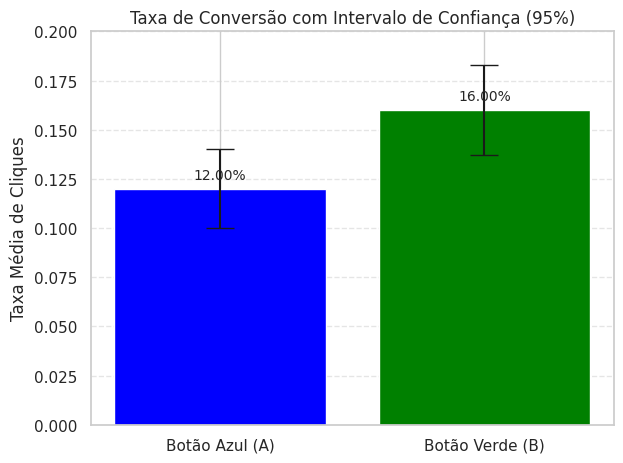

In [77]:
# Gráfico
fig, ax = plt.subplots()
barras = ax.bar(grupos, taxas, yerr=margem_erro, capsize=10, color=['blue', 'green'])

# Rótulos
ax.set_title('Taxa de Conversão com Intervalo de Confiança (95%)')
ax.set_ylabel('Taxa Média de Cliques')
ax.set_ylim(0, 0.2)

# Anotações nas barras
for barra, taxa in zip(barras, taxas):
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2, altura + 0.005, f'{taxa:.2%}', ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()